<a href="https://colab.research.google.com/github/Niharikasingh722/Neural-Networks/blob/main/cifar10_image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

There are 50000 32x32 size color images in train and 10000 32x32 color images in test

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
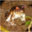

In [6]:
X_train[0]

In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
classes=[	'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
classes[y_train[0][0]]

'frog'

In [10]:
y_train_flat=y_train.reshape(50000,)

In [11]:
type(y_train_flat)

numpy.ndarray

In [12]:
y_train_flat.shape

(50000,)

In [13]:
def idplot(df,y,id):
  plt.figure(figsize=(3,1))
  plt.imshow(df[id])
  print(classes[y[id]])

frog


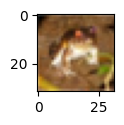

In [14]:
idplot(X_train,y_train_flat,0)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
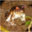

In [15]:
X_train[0]

we need to normalize our data, since the values range from 0-255

In [16]:
X_train=X_train/255
X_test=X_test/255

**ANN:**

In [17]:
ANN=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


ANN.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


ANN.fit(X_train,y_train_flat,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 150s 95ms/step - loss: 1.8152 - accuracy: 0.3521
Epoch 2/10
1563/1563 [==============================] - 146s 93ms/step - loss: 1.6249 - accuracy: 0.4253
Epoch 3/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.5430 - accuracy: 0.4562
Epoch 4/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4831 - accuracy: 0.4782
Epoch 5/10
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4318 - accuracy: 0.4957
Epoch 6/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.3879 - accuracy: 0.5111
Epoch 7/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.3513 - accuracy: 0.5259
Epoch 8/10
1563/1563 [==============================] - 140s 89ms/step - loss: 1.3163 - accuracy: 0.5375
Epoch 9/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.2848 - accuracy: 0.5497
Epoch 10/10
1563/1563 [==============================] 

In [18]:

ANN.evaluate(X_test,y_test)

313/313 [==============================] - 9s 29ms/step - loss: 1.4041 - accuracy: 0.5024


[1.4040796756744385, 0.5023999810218811]

In [19]:

y_pred=ANN.predict(X_test)
y_pred_classes=[np.argmax(i) for i in y_pred]

313/313 [==============================] - 12s 38ms/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print("classification_report \n",classification_report(y_test,y_pred_classes))

classification_report 
               precision    recall  f1-score   support

           0       0.58      0.53      0.56      1000
           1       0.56      0.76      0.65      1000
           2       0.43      0.33      0.37      1000
           3       0.41      0.26      0.32      1000
           4       0.42      0.50      0.46      1000
           5       0.44      0.40      0.42      1000
           6       0.46      0.73      0.56      1000
           7       0.82      0.33      0.47      1000
           8       0.49      0.78      0.60      1000
           9       0.63      0.41      0.50      1000

    accuracy                           0.50     10000
   macro avg       0.52      0.50      0.49     10000
weighted avg       0.52      0.50      0.49     10000



The accuracy on train data is poor and the model performs poorly on test data. And , the model training was very slow.

**CNN**

In [22]:
CNN=keras.Sequential([

    #Convolution
    keras.layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


CNN.fit(X_train,y_train_flat,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.6132 - accuracy: 0.4148
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2444 - accuracy: 0.5621
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1187 - accuracy: 0.6079
Epoch 4/10
1563/1563 [==============================] - 55s 36ms/step - loss: 1.0373 - accuracy: 0.6399
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9829 - accuracy: 0.6565
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9375 - accuracy: 0.6735
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9029 - accuracy: 0.6869
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8747 - accuracy: 0.6957
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8469 - accuracy: 0.7073
Epoch 10/10
1563/1563 [==============================] - 57s 36m

In [23]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.9507 - accuracy: 0.6717


[0.9507052898406982, 0.6717000007629395]

In [24]:
y_pred=CNN.predict(X_test)
y_pred_classes=[np.argmax(i) for i in y_pred]
print("classification_report \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 7s 21ms/step
classification_report 
               precision    recall  f1-score   support

           0       0.76      0.63      0.69      1000
           1       0.83      0.77      0.80      1000
           2       0.64      0.46      0.53      1000
           3       0.49      0.53      0.51      1000
           4       0.60      0.62      0.61      1000
           5       0.59      0.51      0.55      1000
           6       0.78      0.73      0.76      1000
           7       0.63      0.81      0.71      1000
           8       0.74      0.81      0.77      1000
           9       0.70      0.85      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



With CNN the accuray of classification has increased considerably with only 10 epochs of training. It will give better results with more epochs and more layers.